In [215]:
import numpy as np

class Bandit:
    """
    k-armed bandit

        q_mean, q_var: mean, variance of normal distribution that
                       arm rewards are drawn from.

        R_var:         variance of normal, zero-mean, noise 
                       distribution added to arm reward each trial.
    """

    def __init__(self, k, q_mean, q_var, R_var):
        """
        Initialise and create mean arm rewards. 
        """
        self.k = k
        self.q_mean = q_mean
        self.q_var = q_var
        self.R_var = R_var
        self.q_star = np.random.normal(q_mean, q_var, k)

    def __str__(self):
        """
        Print basic information about bandit. 
        """
        return f"{self.k}-arm, Q: {self.q_mean} ({self.q_var}, {self.R_var}) \
            \n\nq*: {self.q_star}"

    def act(self, A):
        """ 
        Return reward value for action A.
        """
        return np.random.normal(self.q_star[A], self.R_var, 1)

    def best(self):
        """
        Return index for best arm 
        """
        return np.argmax(self.q_star)

#help(bandit10)
bandit10 = Bandit(10, 0, 1, 1)
print(bandit10)
bandit10.best()


10-arm, Q: 0 (1, 1)             

q*: [ 0.20381987 -0.06022253  1.0430387  -0.49746726  1.12519059 -1.49905775
  2.40220606 -0.40710819 -0.07159617  0.44824124]


6

In [184]:
class Agent_Mean:
    
    def __init__(self, bandit, k, e):
        self.k = k
        self.e = e
        self.Q = np.zeros(self.k)
        self.N = np.zeros(self.k)
        self.bandit = bandit

    def act(self):
        if np.random.uniform() > self.e:              
            A = np.argmax(self.Q)          # Greedy                  
        else:
            A = np.random.randint(self.k)  # Non-greedy
        
        R = self.bandit.act(A)             # Get reward

        # Update N, Q
        self.N[A] += 1
        self.Q[A] += (1/self.N[A]) * (R - self.Q[A])

        return [np.concatenate((np.array([A]), R, self.Q))]




In [228]:
def do_sim(e):
    k = 10
    steps = 1000
    runs = 2000
    reward = np.zeros(steps)
    optimal = np.zeros(steps)
    for i in range(runs):
        bandit10 = Bandit(10, 0, 1, 1)
        best = bandit10.best()
        agent = Agent_Mean(bandit10, k, e)
        for t in range(steps):
            ret = agent.act()
            reward[t] += ret[0][1]
            if ret[0][0] == best:
                optimal[t] += 1
    reward = reward / runs
    optimal = optimal / runs
    return reward, optimal

reward_p1, optimal_p1 = do_sim(.1)
reward_p01, optimal_p01 = do_sim(.01)
reward_p0, optimal_p0 = do_sim(0)

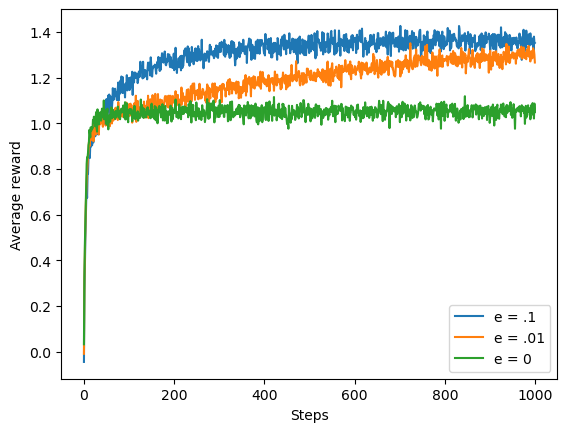

In [230]:
import matplotlib.pyplot as plt
x = range(1000)
plt.plot(x, reward_p1, label='e = .1')
plt.plot(x, reward_p01, label='e = .01')
plt.plot(x, reward_p0, label='e = 0')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

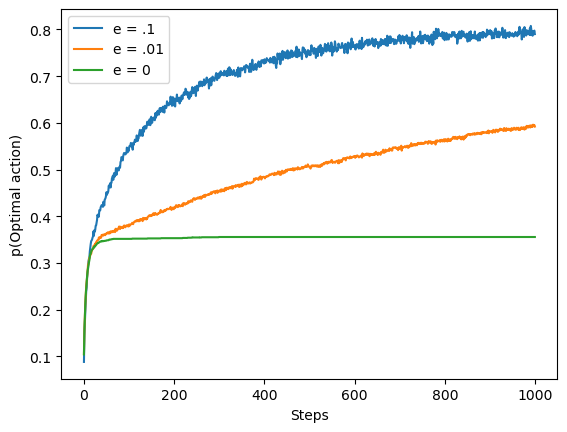

In [231]:
plt.plot(x, optimal_p1, label='e = .1')
plt.plot(x, optimal_p01, label='e = .01')
plt.plot(x, optimal_p0, label='e = 0')
plt.xlabel('Steps')
plt.ylabel('p(Optimal action)')
plt.legend()
plt.show()

In [241]:
import numpy as np

class Bandit_Drift:
    """
    k-armed bandit

        q_mean, q_var:  mean, variance of normal distribution that
                        arm rewards are drawn from.

        R_var:          variance of normal, zero-mean, noise 
                        distribution added to arm reward each trial.

        drift:          variance of normal, zero-mean, random walk
                        distribution applied before each action to
                        each arm.

    """

    def __init__(self, k, q_mean, q_var, R_var, drift):
        """
        Initialise and create mean arm rewards. 
        """
        self.k = k
        self.q_mean = q_mean
        self.q_var = q_var
        self.R_var = R_var
        self.drift = drift
        self.q_star = np.random.normal(q_mean, q_var, k)

    def __str__(self):
        """
        Print basic information about bandit. 
        """
        return f"{self.k}-arm, Q: {self.q_mean} ({self.q_var}, {self.R_var}) \
            \n\nq*: {self.q_star}"

    def act(self, A):
        """ 
        Return reward value for action A.
        """
        self.q_star += np.random.normal(0, self.drift, self.k)
        return np.random.normal(self.q_star[A], self.R_var, 1)

    def best(self):
        """
        Return index for best arm 
        """
        return np.argmax(self.q_star)

#help(bandit10)
bandit10 = Bandit_Drift(10, 0, 1, 1, .01)
print(bandit10)
bandit10.act(4)
print(bandit10)


10-arm, Q: 0 (1, 1)             

q*: [ 0.13698281 -2.38251721  0.27397928  0.55571017 -0.54115507  0.78406953
  1.09432046  1.48904741 -0.13428392  0.82553149]
10-arm, Q: 0 (1, 1)             

q*: [ 0.13340528 -2.37776537  0.27868608  0.54662173 -0.53231982  0.80398476
  1.1136225   1.49986431 -0.13629925  0.81871595]


In [237]:
class Agent_Step:
    
    def __init__(self, bandit, k, e, step):
        self.k = k
        self.e = e
        self.step = step
        self.Q = np.zeros(self.k)
        self.bandit = bandit

    def act(self):
        if np.random.uniform() > self.e:              
            A = np.argmax(self.Q)          # Greedy                  
        else:
            A = np.random.randint(self.k)  # Non-greedy
        
        R = self.bandit.act(A)             # Get reward

        # Update Q
        self.Q[A] += self.step * (R - self.Q[A])

        return [np.concatenate((np.array([A]), R, self.Q))]


In [252]:
def do_sim_step(e, is_step):
    k = 10
    steps = 10000
    runs = 2000
    reward = np.zeros(steps)
    optimal = np.zeros(steps)
    for i in range(runs):
        bandit10 = Bandit_Drift(10, 0, 1, 1, .01)
        if is_step:
            agent = Agent_Step(bandit10, k, e, .1)
        else:
            agent = Agent_Mean(bandit10, k, e)
        for t in range(steps):
            ret = agent.act()
            reward[t] += ret[0][1]
            best = bandit10.best()
            if ret[0][0] == best:
                optimal[t] += 1
    reward = reward / runs
    optimal = optimal / runs
    return reward, optimal

reward_step, optimal_step = do_sim_step(.1, True)
reward_mean, optimal_mean = do_sim_step(.1, False)


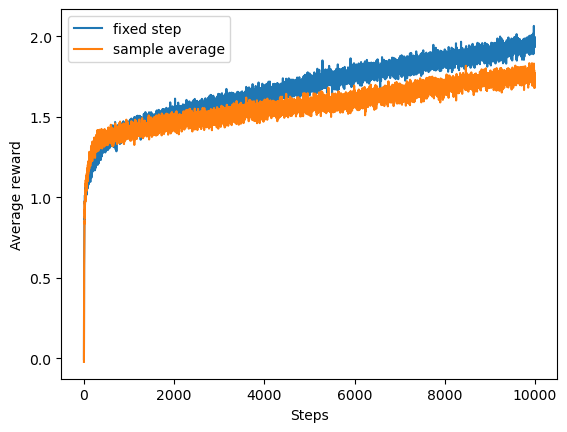

In [253]:
x = range(10000)
plt.plot(x, reward_step, label='fixed step')
plt.plot(x, reward_mean, label='sample average')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

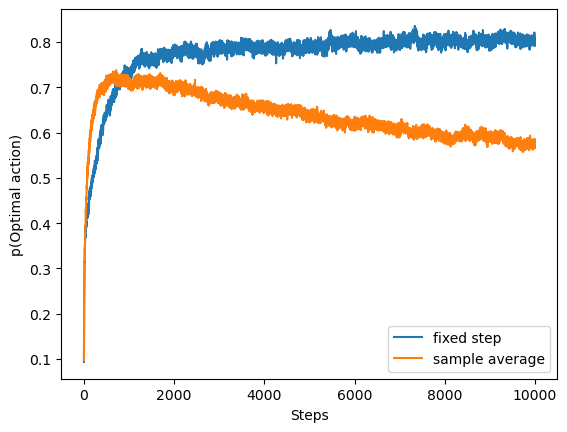

In [254]:
plt.plot(x, optimal_step, label='fixed step')
plt.plot(x, optimal_mean, label='sample average')
plt.xlabel('Steps')
plt.ylabel('p(Optimal action)')
plt.legend()
plt.show()

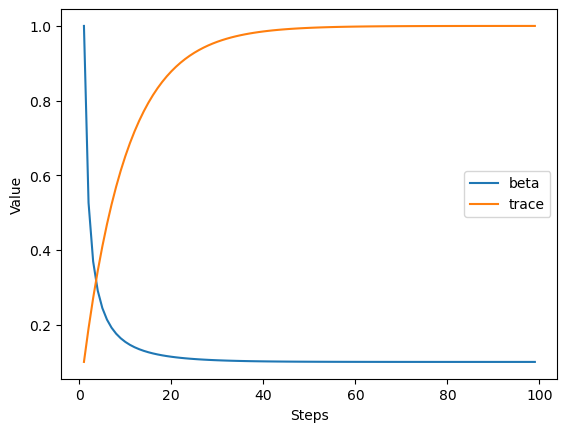

In [273]:
alpha = .1
trace = 0
steps = 100
x = range(steps)
trace_plot = np.zeros(steps)
beta_plot = np.zeros(steps)
for t in range(1,steps):
    trace = trace + alpha * (1 - trace)
    trace_plot[t] = trace
    beta = alpha / trace
    beta_plot[t] = beta

trace_plot[0] = None
beta_plot[0] = None
plt.plot(x, beta_plot, label='beta')
plt.plot(x, trace_plot, label='trace')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.legend()
plt.show()
    